## **A Deep Dive into Pizza Sales and Performance Metric**

In [2]:
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt

#### **Importing the CSV Files :** 

In [3]:
orders        = pd.read_csv(r"C:\Users\nares\Desktop\Pandas Analysis\orders.csv",parse_dates=['time'])
order_details = pd.read_csv(r"C:\Users\nares\Desktop\Pandas Analysis\order_details.csv")
pizzas        = pd.read_csv(r"C:\Users\nares\Desktop\Pandas Analysis\pizzas.csv")
pizza_types   = pd.read_csv(r"C:\Users\nares\Desktop\Pandas Analysis\pizza_types.csv")

#### **Merging the Datasets using Merge :**

In [4]:
Merged_df     = pd.merge(orders,order_details,on='order_id')
Merged_df     = pd.merge(Merged_df,pizzas,on='pizza_id')
Pizza_sales   = pd.merge(Merged_df,pizza_types,on='pizza_type_id')
Pizza_sales.sort_values(by=['order_id'],ascending=[True]).head()

,order_id,date,time,pizza_id,quantity,pizza_type_id,size,price,name,category
0,1,2015-01-01,2023-04-27 11:38:36,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic
9450,2,2015-01-01,2023-04-27 11:57:40,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken
7994,2,2015-01-01,2023-04-27 11:57:40,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie
2370,2,2015-01-01,2023-04-27 11:57:40,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic
6145,2,2015-01-01,2023-04-27 11:57:40,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme


#### **Extracting the Date and Time Components :**

In [5]:
Pizza_sales[['Year','Month','Day']] = Pizza_sales['date'].str.split('-',expand=True)
Pizza_sales['Hour']                 = Pizza_sales['time'].dt.hour

#### **Adding a Column :**

In [6]:
Pizza_sales['Revenue'] = Pizza_sales['quantity'] * Pizza_sales['price']

#### **Dropping the Columns :**

In [7]:
Pizza_sales = Pizza_sales.drop(['pizza_id','pizza_type_id','time'],axis=1)

#### **Re-arranging the Columns :**

In [8]:
Pizza_sales = Pizza_sales[['order_id','name','category','size',
                           'Revenue','Year','Month','Day','date']]
Pizza_sales.head()

,order_id,name,category,size,Revenue,Year,Month,Day,date
0,1,The Hawaiian Pizza,Classic,M,13.25,2015,01,01,2015-01-01
1,77,The Hawaiian Pizza,Classic,M,13.25,2015,01,02,2015-01-02
2,146,The Hawaiian Pizza,Classic,M,13.25,2015,01,03,2015-01-03
3,163,The Hawaiian Pizza,Classic,M,13.25,2015,01,03,2015-01-03
4,247,The Hawaiian Pizza,Classic,M,13.25,2015,01,04,2015-01-04


### **1. Orders by Month :**

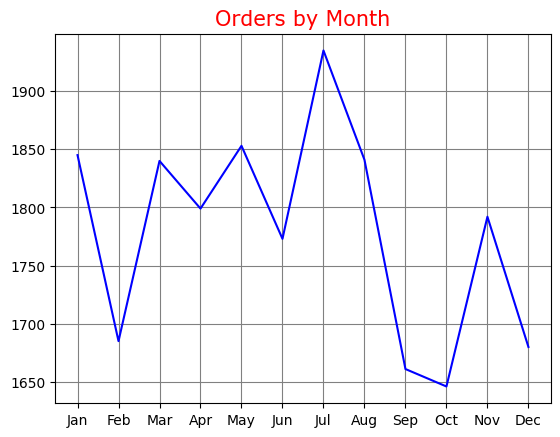

In [9]:
Customer_Count          = Pizza_sales.groupby(['Month']).agg({'order_id':'nunique'}).reset_index()
Month_names             = {'01': 'Jan','02': 'Feb','03': 'Mar','04': 'Apr','05': 'May','06': 'Jun',
                           '07': 'Jul','08': 'Aug','09': 'Sep','10': 'Oct','11': 'Nov','12': 'Dec'}
Customer_Count['Month'] = Customer_Count['Month'].map(Month_names)
Customer_Count          = Customer_Count.rename(columns={'order_id':'Order_Count'})

#Visualizing the data :

X = Customer_Count['Month'] 
Y = Customer_Count['Order_Count'] 
plt.plot(X,Y,color='blue')
plt.title('Orders by Month',font='Verdana',color = 'red',size='15')
from matplotlib import rcParams
rc_params
plt.grid(color ='gray')
plt.show()

#### **2. Top 5 Revenue Generated Pizzas :**

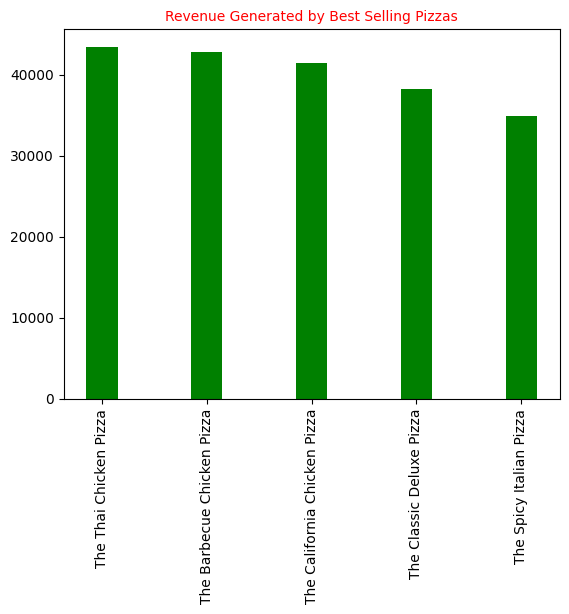

In [36]:
Top_5_pizzas = ( Pizza_sales.groupby(['name']).agg({'Revenue':'sum'})
                .reset_index().sort_values(by=['Revenue'],ascending= [False]).head()
               )

#Visualizing the Data :

X = Top_5_pizzas['name']
Y = Top_5_pizzas['Revenue']
plt.bar(X,Y,color='green',width=0.3)
plt.xticks(rotation=90)
plt.title('Revenue Generated by Best Selling Pizzas',size=10,color='red')
plt.show()

#### **3. Most Number of Times Ordered Pizzas :**

In [11]:
Most_ordered = ( Pizza_sales.groupby(['name']).agg({'order_id':'count'})
                .reset_index().sort_values(by=['order_id'],ascending = [False])
                .rename(columns={'name':'Pizza_Name','order_id':'Order_count'})
               )
Most_ordered.head(10).reset_index(drop=True)

,Pizza_Name,Order_count
0,The Classic Deluxe Pizza,2416
1,The Barbecue Chicken Pizza,2372
2,The Hawaiian Pizza,2370
3,The Pepperoni Pizza,2369
4,The Thai Chicken Pizza,2315
5,The California Chicken Pizza,2302
6,The Spicy Italian Pizza,1887
7,The Sicilian Pizza,1887
8,The Southwest Chicken Pizza,1885
9,The Four Cheese Pizza,1850


#### **4. Pizza by the size : Analyzing Customer Preferences :**

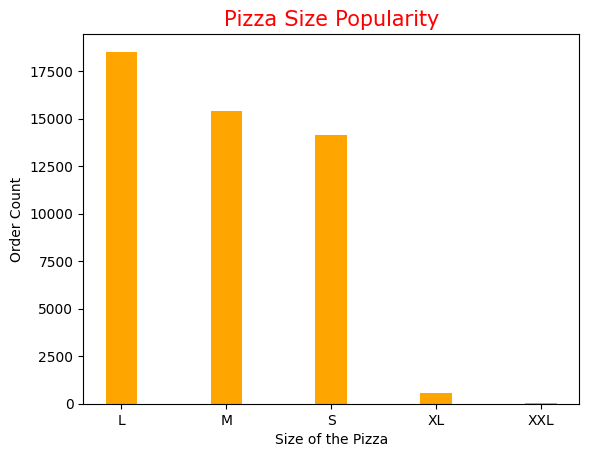

In [35]:
Pizza_size = ( Pizza_sales.groupby(['size']).agg({'name':'count'}).reset_index()
              .sort_values(by=['size'],ascending=[True])
             )
Pizza_size = Pizza_size.rename(columns={'name':'No of Orders'})

#Visualizing the Data :

X = Pizza_size['size']
Y = Pizza_size['No of Orders'] 
plt.xlabel('Size of the Pizza')
plt.ylabel('Order Count')
plt.bar(X,Y,color ='orange',width=0.3)
plt.title('Pizza Size Popularity',color='Red',font='Verdana',size=15)
plt.show()

#### **5. Determining the Best-Selling Pizza in Every Size Category :**

In [27]:
def Best_Seller(Column):
    Pizzas = ( Pizza_sales.groupby(['name',Column]).agg({'order_id':'count'})
              .reset_index().sort_values(by=['order_id'],ascending=[False])
             )
    Pizzas = Pizzas.groupby([Column]).head(1).reset_index(drop=True).rename(columns={'order_id':'No of Times Ordered'})
    return Pizzas
Best_Seller('size')

,name,size,No of Times Ordered
0,The Big Meat Pizza,S,1811
1,The Thai Chicken Pizza,L,1365
2,The Classic Deluxe Pizza,M,1159
3,The Greek Pizza,XL,544
4,The Greek Pizza,XXL,28


#### **6. Determining the Best-Selling Pizza in Every Category :**

In [28]:
Best_Seller('category')

,name,category,No of Times Ordered
0,The Classic Deluxe Pizza,Classic,2416
1,The Barbecue Chicken Pizza,Chicken,2372
2,The Spicy Italian Pizza,Supreme,1887
3,The Four Cheese Pizza,Veggie,1850


#### **7. Revenue Generated by the categories of Pizza :**

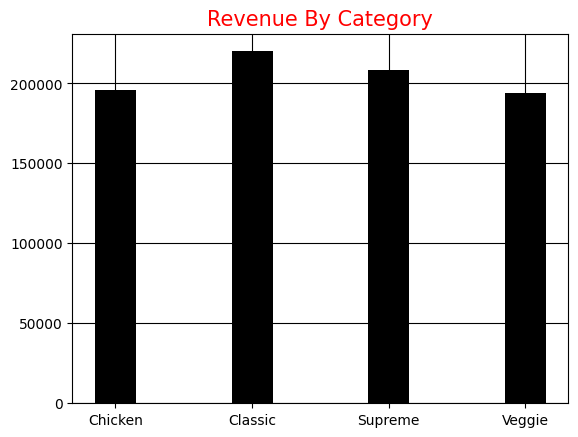

In [34]:
Categories_Revenue            = round(Pizza_sales.groupby(['category']).agg({'Revenue':'sum'}).reset_index())

#Visualizing the Data :

X = Categories_Revenue['category']
Y = Categories_Revenue['Revenue']
plt.bar(X,Y,color='black',width=0.3)
plt.title('Revenue By Category',color='red',size=15)
plt.grid(True,color='black')
plt.show()

#### **8. Overall Revenue :**

In [ ]:
Revenue       = str(round(Pizza_sales['Revenue'].sum()))+' $'
Total_Revenue = pd.DataFrame({'Overall Revenue':[Revenue]})
Total_Revenue

,Overall Revenue
0,817860 $


#### **9. Quarterly Wise Revenue :**

In [ ]:
Quarter_Names = {'01': '1st Quarter', '02': '1st Quarter', '03': '1st Quarter',
                 '04': '2nd Quarter', '05': '2nd Quarter', '06': '2nd Quarter',
                 '07': '3rd Quarter', '08': '3rd Quarter', '09': '3rd Quarter',
                 '10': '4th Quarter', '11': '4th Quarter', '12': '4th Quarter'}
                 
Quarterly_Revenue            = Pizza_sales[['Month','Revenue']]
Quarterly_Revenue            = round(Quarterly_Revenue.groupby(['Month']).agg({'Revenue':'sum'}).reset_index())
Quarterly_Revenue['Quarter'] = Quarterly_Revenue['Month'].map(Quarter_Names)
Quarterly_Revenue            = Quarterly_Revenue.groupby(['Quarter']).agg({'Revenue':'sum'}).reset_index()
Quarterly_Revenue['Revenue'] = Quarterly_Revenue['Revenue'].astype('str').str.strip('.0')+' $'
Quarterly_Revenue

,Quarter,Revenue
0,1st Quarter,20535 $
1,2nd Quarter,20837 $
2,3rd Quarter,205016 $
3,4th Quarter,199124 $


#### **10. Quarterly Wise Number of Orders :**

In [ ]:
Order_Count            = Pizza_sales.groupby(['Month']).agg({'order_id':'nunique'}).reset_index()
Order_Count['Quarter'] = Order_Count['Month'].map(Quarter_Names)
Order_Count            = ( Order_Count.groupby(['Quarter']).agg({'order_id':'sum'})
                          .reset_index().rename(columns={'order_id':'Order_Count'})
                         )
Order_Count

,Quarter,Order_Count
0,1st Quarter,5370
1,2nd Quarter,5425
2,3rd Quarter,5437
3,4th Quarter,5118


#### **11. Contribution of Each and Every Pizza in Over all Revenue :**

In [ ]:
Revenue_per_Pizza    = (Pizza_sales.groupby(['name']).agg({'Revenue':'sum'})
                        .reset_index().sort_values(by=['Revenue'],ascending= [False]))
Total_Revenue        = Pizza_sales['Revenue'].sum()  
Revenue_in_Perc      = round((Revenue_per_Pizza['Revenue']/Total_Revenue)*100,2)
Result               =  ( pd.DataFrame({'name':Revenue_per_Pizza['name'], 'Contribution in Revenue' :Revenue_in_Perc})
                                        .reset_index(drop=True).rename(columns={'name':'Pizza_Name'})
                        )
Result['Contribution in Revenue'] = Result['Contribution in Revenue'].astype('str')+' %'
Result

,Pizza_Name,Contribution in Revenue
0,The Thai Chicken Pizza,5.31 %
1,The Barbecue Chicken Pizza,5.23 %
2,The California Chicken Pizza,5.06 %
3,The Classic Deluxe Pizza,4.67 %
4,The Spicy Italian Pizza,4.26 %
5,The Southwest Chicken Pizza,4.24 %
6,The Italian Supreme Pizza,4.09 %
7,The Hawaiian Pizza,3.95 %
8,The Four Cheese Pizza,3.95 %
9,The Sicilian Pizza,3.78 %
